<a href="https://colab.research.google.com/github/DaveOkpare/european-soccer-analysis/blob/main/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The project focuses on the soccer database comes from
Kaggle and it iss well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

* The database is stored in a SQLite database. I have extracted the dataset using the [OpenDataset](https://github.com/JovianML/opendatasets) library which downloads the dataset from Kaggle. 

  You can obtain API token from [Kaggle](https://kaggle.com/) to download the dataset from this notebook.

* Related tables in the dataset are merged together using SQL joins. 

* Some column titles should be self-explanatory, and others
you’ll have to look up the [dataset source](https://www.kaggle.com/hugomathien/soccer) for more information.


### Question(s) for Analysis

1. Which players are the best penalty takers?

2. Which attributes determine (correlate) with a player's penalty taking ability?

3. Which leagues scored the most home goals or most away goals?

4. Which teams have the most wins?

5. Which teams scored the most goals?

In [ ]:
# Install opendatasets to download dataset from Kaggle.
!pip install opendatasets

In [ ]:
# Import opendatasets and download download dataset from Kaggle.
import opendatasets as od

od.download('https://www.kaggle.com/datasets/hugomathien/soccer')

In [ ]:
# Import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [ ]:
# Load data from SQLite and print out table names.
dbcon = sqlite3.connect('./soccer/database.sqlite')
# dbcon = sqlite3.connect('database.sqlite')
tables = list(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])

print(tables)

['sqlite_sequence', 'Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']


In [ ]:
# Join tables and select columns for analysis
player_query = """
SELECT 
pl.player_api_id, player_name, pl.player_fifa_api_id, birthday, height, weight, 
date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate,
crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve,
free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility,
reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression,	
interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle,
gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes
 FROM Player pl
JOIN Player_Attributes pla
ON pl.player_api_id = pla.player_api_id 
"""

In [ ]:
# Create dataframe using pd.read_sql_query
player_df = pd.read_sql_query(player_query, dbcon)

In [ ]:
# Overview of Player dataframe
player_df.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
# Player dataframe size
player_df.shape

(183978, 45)

In [ ]:
# Player dataframe stats
player_df.describe()

,player_api_id,player_fifa_api_id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,135900.617324,165636.285936,181.878872,168.776245,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,136927.840510,53856.899802,6.394818,15.088920,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2625.000000,2.000000,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34763.000000,155681.000000,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,77741.000000,183471.000000,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,191080.000000,199843.750000,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,750584.000000,234141.000000,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [ ]:
# Info on column's datatypes and non-null count
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   player_name          183978 non-null  object 
 2   player_fifa_api_id   183978 non-null  int64  
 3   birthday             183978 non-null  object 
 4   height               183978 non-null  float64
 5   weight               183978 non-null  int64  
 6   date                 183978 non-null  object 
 7   overall_rating       183142 non-null  float64
 8   potential            183142 non-null  float64
 9   preferred_foot       183142 non-null  object 
 10  attacking_work_rate  180748 non-null  object 
 11  defensive_work_rate  183142 non-null  object 
 12  crossing             183142 non-null  float64
 13  finishing            183142 non-null  float64
 14  heading_accuracy     183142 non-null  float64
 15  short_passing    

In [ ]:
# Percentage of missing values from dataset
player_df.isna().sum() / player_df.shape[0] * 100

player_api_id          0.000000
player_name            0.000000
player_fifa_api_id     0.000000
birthday               0.000000
height                 0.000000
weight                 0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_sho

In [ ]:
# Number of duplicated values 
player_df.duplicated().sum()

1

In [ ]:
player_df[player_df.duplicated()]

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
84924,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
player_df.query('player_api_id == 32968 & date == "2007-02-22 00:00:00"')

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
84698,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,74.0,76.0,right,None,3,52.0,77.0,64.0,46.0,63.0,61.0,54.0,67.0,24.0,66.0,74.0,81.0,64.0,62.0,75.0,69.0,87.0,89.0,82.0,68.0,24.0,64.0,84.0,62.0,67.0,22.0,24.0,44.0,20.0,20.0,24.0,12.0,19.0
84923,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84924,32968,John Potter,51384,1979-12-15 00:00:00,185.42,183,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**Some issues with `player_df` dataframe:**

*   Incorrect datatypes. `Date` needs to be converted to datetime
*   Some columns have a small percentage of missing data. We can fill them with the mean values.
*   Dataframe contains duplicate values. 



In [ ]:
# Join tables and select columns for analysis
team_query = """
SELECT 
tm.team_api_id, tm.team_fifa_api_id, team_long_name, team_short_name, date, buildUpPlaySpeed, 
buildUpPlaySpeedClass, buildUpPlayDribbling, buildUpPlayDribblingClass, buildUpPlayPassing, 	
buildUpPlayPassingClass, buildUpPlayPositioningClass, chanceCreationPassing, 
chanceCreationPassingClass, chanceCreationCrossing, chanceCreationCrossingClass, 
chanceCreationShooting, chanceCreationShootingClass, chanceCreationPositioningClass, 
defencePressure, defencePressureClass, defenceAggression, defenceAggressionClass, 
defenceTeamWidth, defenceTeamWidthClass, defenceDefenderLineClass
 FROM Team tm
JOIN Team_Attributes tma
ON tm.team_api_id = tma.team_api_id
"""

In [ ]:
# Create dataframe using pd.read_sql_query
team_df = pd.read_sql_query(team_query, dbcon)

In [ ]:
# Overview on Team dataframe
team_df.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,434,FC Aarau,AAR,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,434,FC Aarau,AAR,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,434,FC Aarau,AAR,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,77,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,77,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [ ]:
# Info on column's datatypes and non-null count
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_api_id                     1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_long_name                  1458 non-null   object 
 3   team_short_name                 1458 non-null   object 
 4   date                            1458 non-null   object 
 5   buildUpPlaySpeed                1458 non-null   int64  
 6   buildUpPlaySpeedClass           1458 non-null   object 
 7   buildUpPlayDribbling            489 non-null    float64
 8   buildUpPlayDribblingClass       1458 non-null   object 
 9   buildUpPlayPassing              1458 non-null   int64  
 10  buildUpPlayPassingClass         1458 non-null   object 
 11  buildUpPlayPositioningClass     1458 non-null   object 
 12  chanceCreationPassing           14

In [ ]:
# Number of missing values from dataset
team_df.isna().sum()

team_api_id                         0
team_fifa_api_id                    0
team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [ ]:
# Number of duplicated values
team_df.duplicated().sum()

1

In [ ]:
team_df[team_df.duplicated()]

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
860,9996,111560,Royal Excel Mouscron,MOU,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover



**Some issues with `team_df` dataframe:**

*   Incorrect datatypes. `Date` needs to be converted to datetime
*   `buildUpPlayDribbling` contains a lot of missing data. We would drop the column.
*   Dataframe has duplicate values. 

In [ ]:
# Join tables and select columns for analysis
match_query = """
WITH home_team AS (SELECT t.team_long_name as home_team, m.id id_t
FROM team t
JOIN match m
ON m.home_team_api_id=t.team_api_id),
away_team AS (SELECT t.team_long_name as away_team, m.id id_t
FROM team t
JOIN match m
ON m.away_team_api_id=t.team_api_id)
SELECT m.date date_match, m.season, l.name league, ht.home_team,
a_t.away_Team, m.home_team_goal home_goal, m.away_team_goal away_goal
FROM League as l
JOIN match m
ON l.id = m.league_id
JOIN home_team ht
ON ht.id_t=m.id
JOIN away_team a_t
ON a_t.id_t=m.id
ORDER BY date_match
"""

In [ ]:
# Create dataframe using pd.read_sql_query
match_df = pd.read_sql_query(match_query, dbcon)

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_match  25979 non-null  object
 1   season      25979 non-null  object
 2   league      25979 non-null  object
 3   home_team   25979 non-null  object
 4   away_team   25979 non-null  object
 5   home_goal   25979 non-null  int64 
 6   away_goal   25979 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
# Overview on Match dataframe
match_df.head()

,date_match,season,league,home_team,away_team,home_goal,away_goal
0,2008-07-18 00:00:00,2008/2009,Switzerland Super League,BSC Young Boys,FC Basel,1,2
1,2008-07-19 00:00:00,2008/2009,Switzerland Super League,FC Aarau,FC Sion,3,1
2,2008-07-20 00:00:00,2008/2009,Switzerland Super League,FC Luzern,FC Vaduz,1,2
3,2008-07-20 00:00:00,2008/2009,Switzerland Super League,Neuchâtel Xamax,FC Zürich,1,2
4,2008-07-23 00:00:00,2008/2009,Switzerland Super League,FC Basel,Grasshopper Club Zürich,1,0


In [ ]:
match_df.isna().sum()

date_match    0
season        0
league        0
home_team     0
away_team     0
home_goal     0
away_goal     0
dtype: int64

In [ ]:
match_df.duplicated().sum()

0


**Observations on `match_df` dataframe:**

*   Incorrect datatypes. `date_match` needs to be converted to datetime
* It contains no missing values or duplicates


### Data Cleaning
 

In [ ]:
# Fixing datetime datatype
player_df['birthday'] = pd.to_datetime(player_df['birthday'])
player_df['date'] = pd.to_datetime(player_df['date'])
team_df['date'] = pd.to_datetime(team_df['date'])
match_df['date_match'] = pd.to_datetime(match_df['date_match'])

In [ ]:
# Dropping duplicates
player_df.drop(index=[84923, 84924], inplace=True)
team_df.drop_duplicates(inplace=True)

In [ ]:
# Filling missing values with mean
player_numeric_columns = player_df.select_dtypes(include=np.number)
player_numeric_columns.fillna(player_numeric_columns.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Dropping missing values
team_df.dropna(axis='columns', inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which players are the best penalty takers?

We will calculate the mean penalty attribute of each player. For the scores, we will sort them from best to least best.The data will be plotted in a bar chart to have a clear visualization on the average players' penalty score.

In [ ]:
# Groups the dataframe by mean
def groupby_mean(data, x, y=None):
    '''A function to pivot dataframe with mean()'''
    if y is None:
        return data.groupby(x).mean()
    return data.groupby(x).mean()[y]

In [ ]:
# Groups the dataframe by sum
def groupby_sum(data, x, y=None):
    '''A function to pivot dataframe with sum()'''
    if y is None:
        return data.groupby(x).sum()
    return data.groupby(x).sum()[y]

In [ ]:
best_penalty_takers = groupby_mean(player_df, x='player_name', y='penalties')
best_penalty_takers = best_penalty_takers.sort_values(ascending=False).head(10)

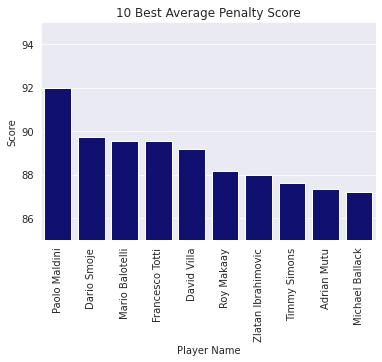

In [ ]:
ax = sns.barplot(y=best_penalty_takers.values, x=best_penalty_takers.index, color='navy')
ax.tick_params(axis='x', rotation=90)
plt.ylim(85, 95)
plt.title('10 Best Average Penalty Score')
plt.xlabel("Player Name")
plt.ylabel("Score");

Paolo Maldini was the best penalty taker between that period. But what attributes makes this player better than others at penalties?

### Research Question 2: Which attributes influences penalties attributes? 
We once again use the mean score and find the correlation between penalties and other player attributes. The data will be plotted in a scatter plot to have a clear visualization on the correlation of attributes.

> Positive Correlation -- Variables increase together, decrease together.

> Negative Correlation -- A variable increases, while the other decreases.

> Neutral, or zero means no correlation.

In [ ]:
correlation = groupby_mean(player_df, 'player_name').corr()

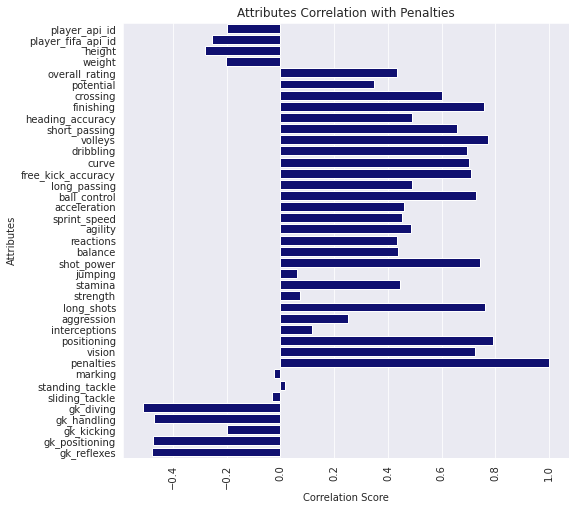

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=correlation['penalties'].values, y=correlation['penalties'].index, color='navy')
ax.tick_params(axis='x', rotation=90)
plt.title('Attributes Correlation with Penalties')
plt.ylabel('Attributes')
plt.xlabel('Correlation Score');

In [ ]:
def scatter_plot_by(data, x, y, xlabel, ylabel):
    '''A function to draw scatter plots'''
    sns.scatterplot(data=data, x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Correlation between {xlabel} and {ylabel}')
    plt.show();

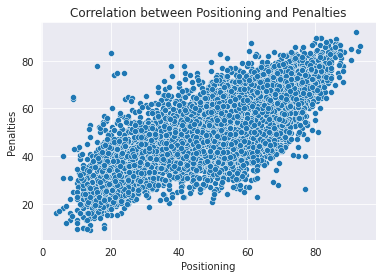

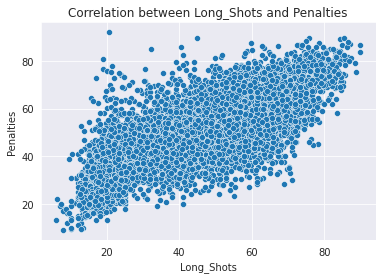

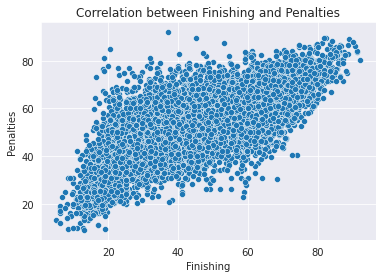

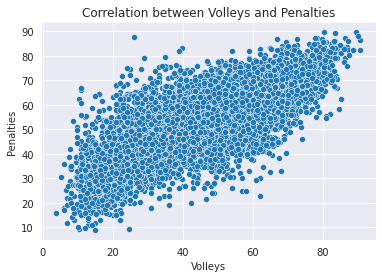

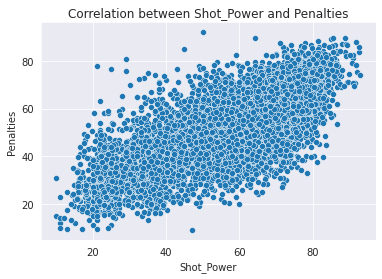

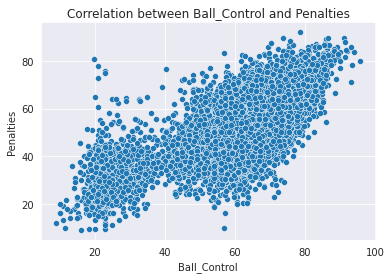

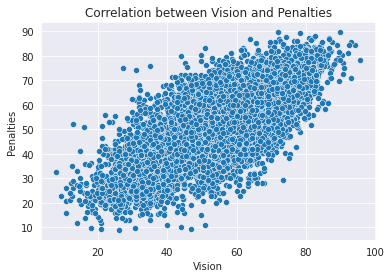

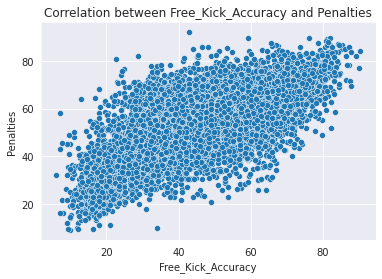

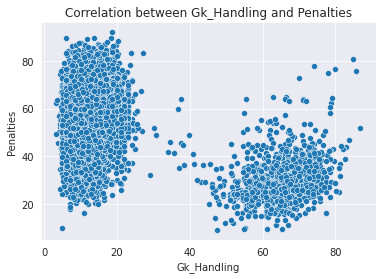

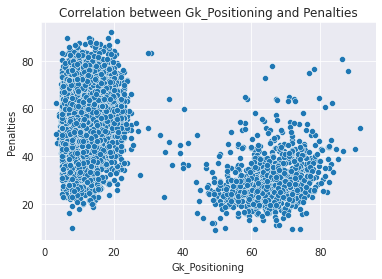

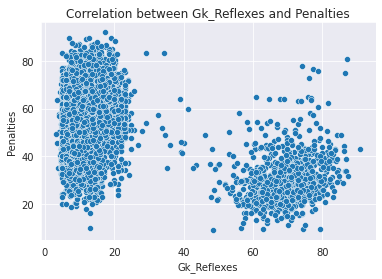

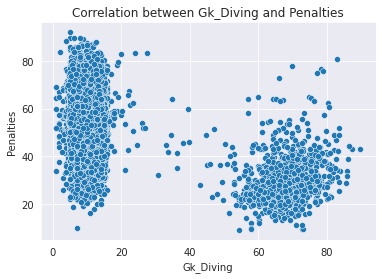

In [ ]:
related_attributes = ['positioning', 'long_shots', 'finishing', 'volleys', 
                      'shot_power', 'ball_control', 'vision', 'free_kick_accuracy',
                      'gk_handling', 'gk_positioning', 'gk_reflexes', 'gk_diving']

player_pivot_table = groupby_mean(player_df, 'player_name')

for i, col in enumerate(related_attributes):
    scatter_plot_by(player_pivot_table, x=col, y='penalties', xlabel=col.title(), ylabel="Penalties")


`long_shots`, `finishing`, `volleys`, `shot_power`, `ball_control`, `vision`, `free_kick_accuracy` have strong positive correlations with a player's ability to take penalties. 


`gk_handling`, `gk_positioning`, `gk_reflexes`, `gk_diving` have negative correlations with penalties.     

### Research Question 3: Which league have the most goal scored?
We group the dataset by league and aggregate the home and away goals to find the total number of goals scored. The data will be plotted in a bar chart to have a clear visualization on the goal distribution by league.


In [ ]:
league_goals = groupby_sum(match_df, 'league').sum(axis=1)
league_goals.sort_values(ascending=False)

league
Spain LIGA BBVA             8412
England Premier League      8240
Italy Serie A               7895
Netherlands Eredivisie      7542
France Ligue 1              7427
Germany 1. Bundesliga       7103
Portugal Liga ZON Sagres    5201
Belgium Jupiler League      4841
Scotland Premier League     4804
Poland Ekstraklasa          4656
Switzerland Super League    4166
dtype: int64

In [ ]:
league_goals.values

array([4841, 8240, 7427, 7103, 7895, 7542, 4656, 5201, 4804, 8412, 4166])

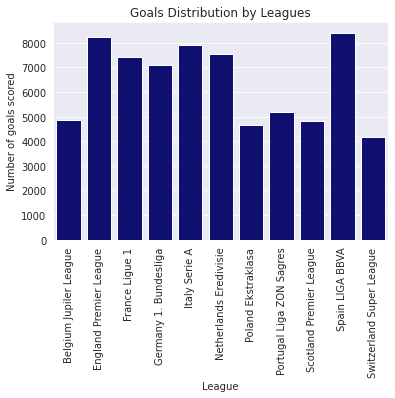

In [ ]:
ax = sns.barplot(y=league_goals.values, x=league_goals.index, color='navy')
ax.tick_params(axis='x', rotation=90)
plt.title('Goals Distribution by Leagues')
plt.ylabel('Number of goals scored')
plt.xlabel('League');

Spain LIGA BBVA scored the most goals over that period, closely followed by England Premier League.

### Research Question 4: Which leagues have the most home goals or most away goals?

We group the dataset by league and aggregate the home and away goals scored. The data will be plotted in a proportion bar chart to have a clear visualization on the home and away goal distribution by league.

In [ ]:
league_pivot_table = groupby_sum(match_df, 'league')

In [ ]:
league_pivot_table.sort_values(by=['away_goal', 'home_goal'], ascending=False)

,home_goal,away_goal
league,,
England Premier League,4715,3525
Spain LIGA BBVA,4959,3453
Italy Serie A,4528,3367
Netherlands Eredivisie,4357,3185
France Ligue 1,4265,3162
Germany 1. Bundesliga,3982,3121
Portugal Liga ZON Sagres,2890,2311
Scotland Premier League,2607,2197
Belgium Jupiler League,2781,2060


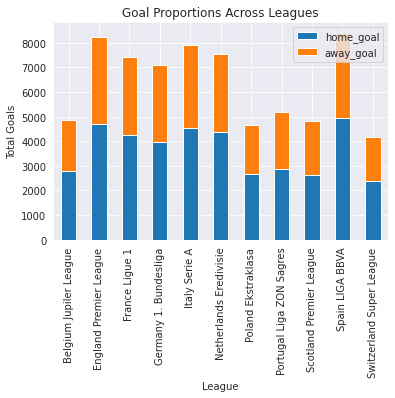

In [ ]:
league_pivot_table.plot(kind='bar', stacked=True)
plt.title('Goal Proportions Across Leagues')
plt.ylabel('Total Goals')
plt.xlabel('League');

England Premier League had more away goals than Spain LIGA BBVA. Meanwhile, Switzerland Super League had the least home and away goals.

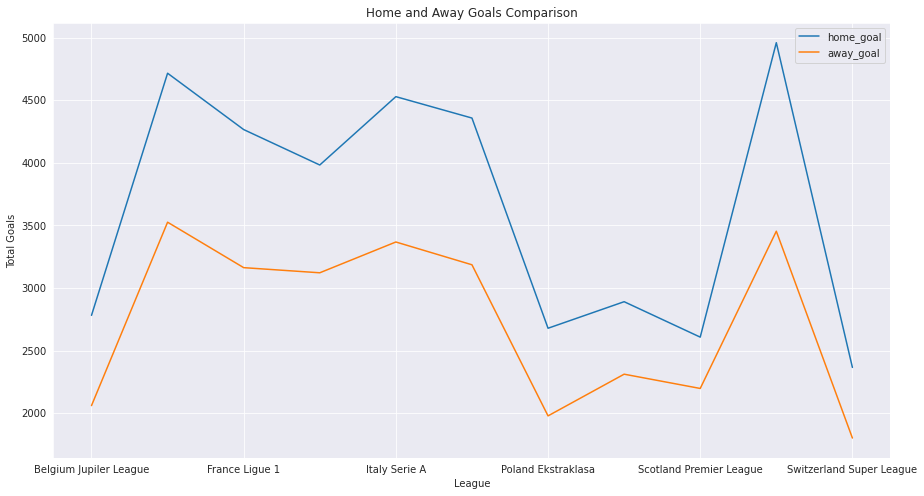

In [ ]:
# Home goals against away goals
league_pivot_table.plot(figsize=(15,8))
plt.title('Home and Away Goals Comparison')
plt.ylabel('Total Goals')
plt.xlabel('League');

Teams across the leagues score more goals on average at home than away.

### Research Question 5: Which teams have the most win?

We create a new feature to find out which teams won the match by comparing home goals scored with away goals scored. The dataset is then grouped using the winning team feature and we plot a bar chart using the number of wins a team possesses.


In [ ]:
# Find the winning team 
conditions = [
              match_df['home_goal'] > match_df['away_goal'],
              match_df['home_goal'] < match_df['away_goal']
]

winner = [match_df['home_team'], match_df['away_team']]

match_df['winning_team'] = np.select(conditions, winner, default=None)

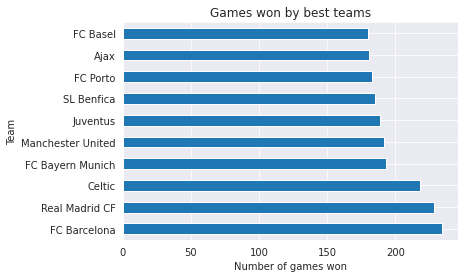

In [ ]:
match_df['winning_team'].value_counts(ascending=False).head(10).plot(kind='barh')
plt.title("Games won by best teams")
plt.xlabel('Number of games won')
plt.ylabel('Team');

FC Barcelona won the most games over the 8 year period. They are followed by Real Madrid CF, Celtic, FC Bayern Munich, Manchester United, Juventus, SL Benifica, FC Porto, Ajax and FC Basel.

### Research Question 6: How many teams scored more than 600 goals?

The distribution will be plotted in a histogram to have a clear visualization on the goal distribution by teams.

In [ ]:
# Number of unique values
match_df.nunique()

date_match      1694
season             8
league            11
home_team        296
away_team        296
home_goal         11
away_goal         10
winning_team     296
dtype: int64

In [ ]:
team_pivot_table = groupby_sum(match_df, 'winning_team').sum(axis=1)
team_pivot_table.sort_values(ascending=False).head(15)

winning_team
Real Madrid CF         951
FC Barcelona           909
Celtic                 705
FC Bayern Munich       686
PSV                    683
Ajax                   633
FC Basel               630
SL Benfica             599
Manchester City        598
Manchester United      593
FC Porto               577
Chelsea                566
Paris Saint-Germain    557
Borussia Dortmund      541
Arsenal                532
dtype: int64

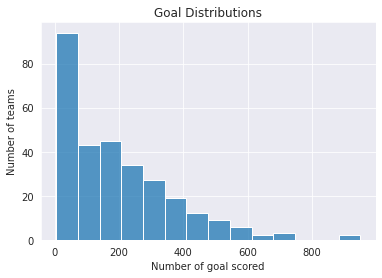

In [ ]:
sns.histplot(team_pivot_table)
plt.title('Goal Distributions')
plt.ylabel('Number of teams')
plt.xlabel('Number of goal scored');

**Only a few teams have scored 600 goals or better between 2008 and 2016**

<a id='conclusions'></a>
## Conclusions

Based on the data presented, teams tend to score more goals at home than away, regardless of which league they belong.

Player with good long shots, finishing, volleys, shot power, ball control, vision and free kick accuracy are the best penalty takers. 

Spain LIGA BBVA scored the most goals and home goals, but England Premier League scored the most away goals.

8 teams out 296 won 600 or more matches over the period of 2008 and 2016.

**However, the dataset did not include the teams players were part of, and the number goals scored by each player. Thus, we are unable to measure player's individual contributions to teams' success.**

<a id="references"></a>
## References

* [Accessing SQLite Database using Pandas](https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html)
* [Downloading Kaggle Dataset to Google Colab](https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/)
* [Seaborn Bar Plot](https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/)
* [Seaborn Stacked Bar Plot](https://www.geeksforgeeks.org/how-to-create-a-stacked-bar-plot-in-seaborn/)